# Loan Data Analysis and Feature Importance

In this notebook, we will perform various analyses on the credit data and determine the important characteristics. First, we will upload and clear the data. Next, we will train the data using different machine learning models and compare their performance. Finally, we will select the best model and visualize the feature importance ranking of this model.

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(x, y):
    log_reg = LogisticRegression()
    knn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gbdt = GradientBoostingClassifier()
    svc = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    mlp = MLPClassifier()

    algos = [log_reg, knn, rf, ada, gbdt, svc, nb, dt, mlp]
    algo_names = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 
                   'SVC', 'Naive Bayes', 'Decision Tree', 'MLP']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []

    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=algo_names)
    
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        precision.append(precision_score(y_test, p, average='weighted'))
        recall.append(recall_score(y_test, p, average='weighted'))
        f1.append(f1_score(y_test, p, average='weighted'))
        
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F1_Score = f1
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


### The dataset consists of the following fields:
* Loan ID: A unique Identifier for the loan information.
* Customer ID: A unique identifier for the customer. Customers may have more than one loan.
* Loan Status: A categorical variable indicating if the loan was paid back or defaulted.
* Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.
* Term: A categorical variable indicating if it is a short term or long term loan.
* Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.
* Years in current job: A categorical variable indicating how many years the customer has been in their current job.
* Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage
* Annual Income: The customer's annual income
* Purpose: A description of the purpose of the loan.
* Monthly Debt: The customer's monthly payment for their existing loans
* Years of Credit History: The years since the first entry in the customer’s credit history • Months since last delinquent: Months since the last loan delinquent payment
* Number of Open Accounts: The total number of open credit cards
* Number of Credit Problems: The number of credit problems in the customer records.
* Current Credit Balance: The current total debt for the customer
* Maximum Open Credit: The maximum credit limit for all credit sources.
* Bankruptcies: The number of bankruptcies
* Tax Liens: The number of tax liens.



In [3]:
df = pd.read_csv("data/LoansTrainingSet.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report')
# profile 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

--------------------
* Drop duplicates

In [6]:
#duplicate rows in the dataset will be removed
print(df.shape)
df = df.drop_duplicates()
print(df.shape)


(256984, 19)
(240374, 19)


---------------
* Annual Income, Years in current job > They have missing values. 
* We need to fill them with some values.
* We can fill them acording to the distribution of the data.

In [7]:
df["Credit Score"] = df["Credit Score"].fillna(pd.Series(np.random.choice(df['Credit Score'].dropna().value_counts().index, size=df['Credit Score'].isnull().sum(), p=df['Credit Score'].dropna().value_counts(normalize=True)), index=df[df['Credit Score'].isnull()].index))
df["Annual Income"] = df["Annual Income"].fillna(pd.Series(np.random.choice(df['Annual Income'].dropna().value_counts().index, size=df['Annual Income'].isnull().sum(), p=df['Annual Income'].dropna().value_counts(normalize=True)), index=df[df['Annual Income'].isnull()].index))

In [8]:
df["Years in current job"] = df['Years in current job'].fillna(pd.Series(np.random.choice(df['Years in current job'].dropna().value_counts().index, size=df['Years in current job'].isnull().sum(), p=df['Years in current job'].dropna().value_counts(normalize=True)), index=df[df['Years in current job'].isnull()].index))
df["Years in current job"].describe()


count        240374
unique           11
top       10+ years
freq          77307
Name: Years in current job, dtype: object

------------------------------------------------------------------
* Maximum open credit has unsupportable data type. We need to convert it to float. 
* after that. it has skewed distribution. We need to handle it.
* some techics will be tried. 
* after that, i choose to use log transformation.

In [9]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].replace("#VALUE!", np.nan)
df["Maximum Open Credit"] = df["Maximum Open Credit"].astype(float)
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(pd.Series(np.random.choice(df['Maximum Open Credit'].dropna().value_counts().index, size=df['Maximum Open Credit'].isnull().sum(), p=df['Maximum Open Credit'].dropna().value_counts(normalize=True)), index=df[df['Maximum Open Credit'].isnull()].index))


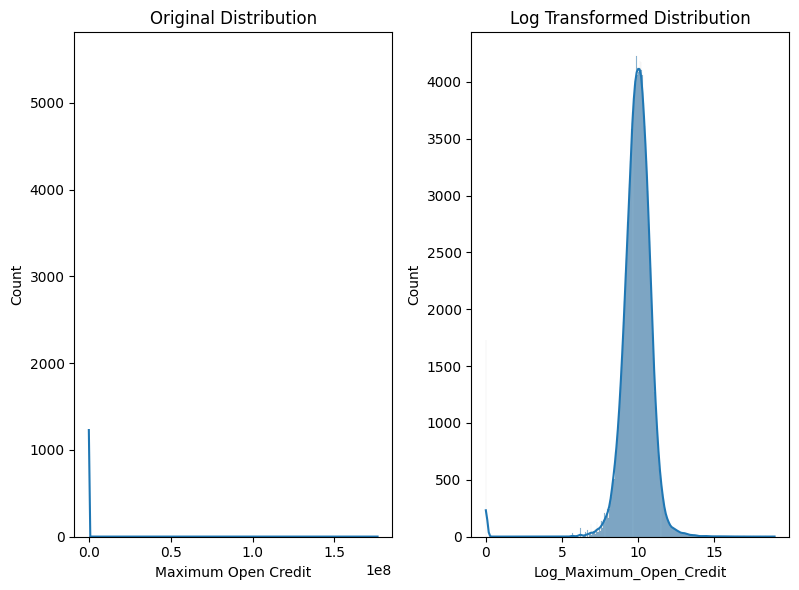

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
df['Log_Maximum_Open_Credit'] = np.log1p(df['Maximum Open Credit'])

plt.figure(figsize=(20, 6))

plt.subplot(1, 5, 1)
sns.histplot(df['Maximum Open Credit'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 5, 2)
sns.histplot(df['Log_Maximum_Open_Credit'], kde=True)
plt.title('Log Transformed Distribution')


plt.tight_layout()
plt.show()



In [11]:
print("Original Skewness:", skew(df['Maximum Open Credit']))
print("Original Kurtosis:", kurtosis(df['Maximum Open Credit']))

print("Log Transformed Skewness:", skew(df['Log_Maximum_Open_Credit']))
print("Log Transformed Kurtosis:", kurtosis(df['Log_Maximum_Open_Credit']))


Original Skewness: 230.64838459860553
Original Kurtosis: 62082.65761954167
Log Transformed Skewness: -4.067604122036582
Log Transformed Kurtosis: 33.22260270252668


In [12]:
# I'll use the log transformation for Maximum Open Credit feature. drop the other transformed features
# df.drop(['Sqrt_Maximum_Open_Credit', 'Yuan_Maximum_Open_Credit'], axis=1, inplace=True)

--------------
* Annual_income has skewed distribution. We need to handle it.
* some techics will be tried. 
* after that, i choose to use log transformation.

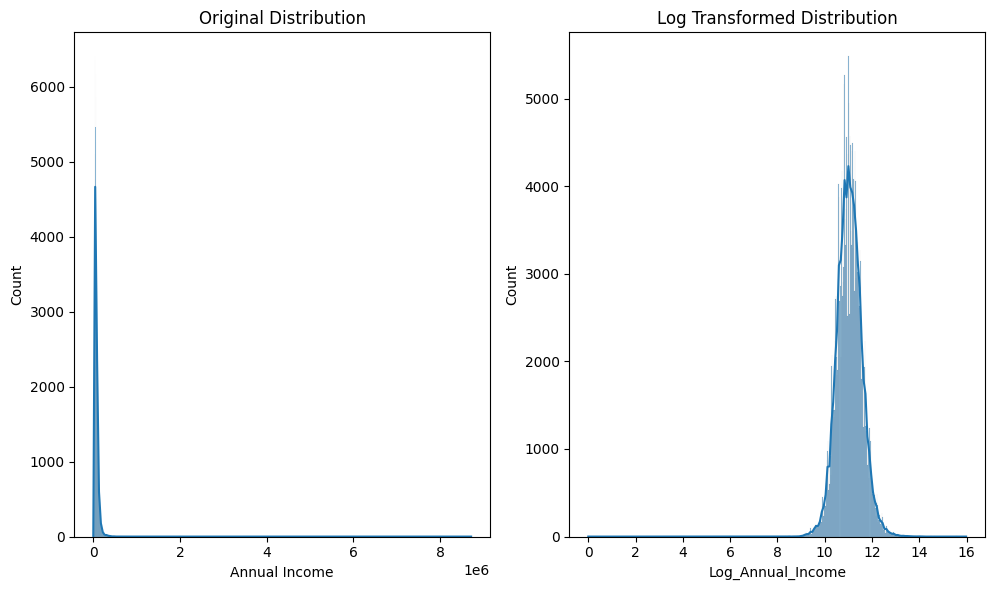

In [13]:
df['Log_Annual_Income'] = np.log1p(df['Annual Income'])
from scipy import stats


plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Annual Income'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Log_Annual_Income'], kde=True)
plt.title('Log Transformed Distribution')




plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import skew, kurtosis

print("Original Skewness:", skew(df['Annual Income']))
print("Original Kurtosis:", kurtosis(df['Annual Income']))

print("Log Transformed Skewness:", skew(df['Log_Annual_Income']))
print("Log Transformed Kurtosis:", kurtosis(df['Log_Annual_Income']))


Original Skewness: 42.04343589375087
Original Kurtosis: 5259.745937649979
Log Transformed Skewness: 0.13042747103211916
Log Transformed Kurtosis: 1.8175850319191937


In [15]:
# I'll try boxcox and log, so i can delete other ones
# df.drop(['Sqrt_Annual_Income', 'Yuan_Annual_Income'], axis=1, inplace=True)

----------------------
* Purpose has features that are similar to each other. I will combine them.
* and it has some imbalance problem. I will fix it.

In [16]:
#concate other - Other in purpose
df['Purpose'] = df['Purpose'].replace('other', 'Other')
df['Purpose'].value_counts()

Purpose
Debt Consolidation      190656
Other                    22336
Home Improvements        14106
Business Loan             4275
Buy a Car                 3150
Medical Bills             2687
Take a Trip               1467
Buy House                 1445
Educational Expenses       252
Name: count, dtype: int64

In [17]:
#  the "purpose" data will be weighted with the inverse ratio to the frequency of the data
purpose_weight = df['Purpose'].value_counts(normalize=True).to_dict()
df['purpose_weight'] = df['Purpose'].map(purpose_weight)
df['purpose_weight'] = 1/df['purpose_weight']

In [18]:
# Purpose to another df
purpose_df = df[['Purpose']]
df = df.drop('Purpose', axis=1)

------------------
* Month since last delinquent feature has 53% missing values. I won't use this feature.

In [19]:
# Drop column -> Months since last delinquent to another dataframe
df_Months_since_last_delinquent = df["Months since last delinquent"]
df = df.drop(columns=["Months since last delinquent"])

-------------
* monthly debt is going to be transformed to int

In [20]:
#to int
df["Monthly Debt"] = df["Monthly Debt"].str.replace("$", "").str.replace(",", "").astype(float)


-----------------------
* Loan status : Fully Paid ->1 , Charged Off ->0

In [21]:
df["Loan Status"] = df["Loan Status"].replace("Fully Paid", 1)
df["Loan Status"] = df["Loan Status"].replace("Charged Off", 0)


-----------------------
* Term : Long Term ->1 , Short Term ->0

In [22]:
df["Term"] = df["Term"].replace("Long Term", 1)
df["Term"] = df["Term"].replace("Short Term", 0)


------------
* Bankrupties has missing value

In [23]:
#bankruptcies
df["Bankruptcies"] = df["Bankruptcies"].fillna(pd.Series(np.random.choice(df['Bankruptcies'].dropna().value_counts().index, size=df['Bankruptcies'].isnull().sum(), p=df['Bankruptcies'].dropna().value_counts(normalize=True)), index=df[df['Bankruptcies'].isnull()].index))
df["Bankruptcies"] = df["Bankruptcies"].astype(int)

---------------------
* Years in curr job to int data type

In [24]:
#Years in current job
df["Years in current job"] = df["Years in current job"].replace("< 1 year", 0)
df["Years in current job"] = df["Years in current job"].replace("1 year", 1)
df["Years in current job"] = df["Years in current job"].replace("2 years", 2)
df["Years in current job"] = df["Years in current job"].replace("3 years", 3)
df["Years in current job"] = df["Years in current job"].replace("4 years", 4)
df["Years in current job"] = df["Years in current job"].replace("5 years", 5)
df["Years in current job"] = df["Years in current job"].replace("6 years", 6)
df["Years in current job"] = df["Years in current job"].replace("7 years", 7)
df["Years in current job"] = df["Years in current job"].replace("8 years", 8)
df["Years in current job"] = df["Years in current job"].replace("9 years", 9)
df["Years in current job"] = df["Years in current job"].replace("10+ years", 10)
df["Years in current job"] = df["Years in current job"].astype(int)

#or classifying the years in current job (low , medium , high)
df["Length of current job"] = df["Years in current job"].apply(lambda x: 1 if x < 3 else 2 if x < 6 else 3)

-------------
* Tax lines

In [25]:
df["Tax Liens"] = df["Tax Liens"].fillna(pd.Series(np.random.choice(df['Tax Liens'].dropna().value_counts().index, size=df['Tax Liens'].isnull().sum(), p=df['Tax Liens'].dropna().value_counts(normalize=True)), index=df[df['Tax Liens'].isnull()].index))

----------------
* Loan Id and Customer Id will be dropped to another dataframe


In [26]:
df_Loan_ID = df["Loan ID"]
df_Customer_ID = df["Customer ID"]
df = df.drop(columns=["Loan ID", "Customer ID"])

--------------
* Home ownership to int


In [27]:
df["Home Ownership"] = df["Home Ownership"].replace("Home Mortgage", 0)
df["Home Ownership"] = df["Home Ownership"].replace("Rent", 1)
df["Home Ownership"] = df["Home Ownership"].replace("Own Home", 2)
df["Home Ownership"] = df["Home Ownership"].replace("HaveMortgage", 3)

In [28]:
df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Log_Maximum_Open_Credit,Log_Annual_Income,purpose_weight,Length of current job
256979,1,3911,0,722.0,2,1,49152.0,1706.58,19.9,16,0,43992,44080.0,0,0.0,10.693784,10.802693,1.260773,1
256980,1,5078,0,737.0,10,2,77186.0,1376.47,19.1,9,0,1717,9758.0,0,0.0,9.185945,11.253986,1.260773,3
256981,0,12116,0,7460.0,9,0,52504.0,297.96,15.1,8,0,3315,20090.0,0,0.0,9.908027,10.868664,1.260773,3
256982,0,12116,0,746.0,9,0,52504.0,297.96,15.1,8,0,3315,20090.0,0,0.0,9.908027,10.868664,1.260773,3
256983,1,27902,1,678.0,10,0,117480.0,2525.82,18.0,10,0,28317,62371.0,0,0.0,11.040872,11.674032,1.260773,3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                240374 non-null  int64  
 1   Current Loan Amount        240374 non-null  int64  
 2   Term                       240374 non-null  int64  
 3   Credit Score               240374 non-null  float64
 4   Years in current job       240374 non-null  int32  
 5   Home Ownership             240374 non-null  int64  
 6   Annual Income              240374 non-null  float64
 7   Monthly Debt               240374 non-null  float64
 8   Years of Credit History    240374 non-null  float64
 9   Number of Open Accounts    240374 non-null  int64  
 10  Number of Credit Problems  240374 non-null  int64  
 11  Current Credit Balance     240374 non-null  int64  
 12  Maximum Open Credit        240374 non-null  float64
 13  Bankruptcies               240374 

In [31]:
# we will split data into two parts, one for the model and the other for the prediction
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Loan Status"])
y = df["Loan Status"]

In [32]:
algo_test_classification(X, y)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.793739,0.784297,0.793739,NaN
Gradient Boosting,0.786958,0.781526,0.786958,NaN
AdaBoost,0.786292,0.775375,0.786292,NaN
Logistic Regression,0.783651,0.790370,0.783651,NaN
MLP,0.783151,0.786896,0.783151,NaN
KNN,0.742860,0.718470,0.742860,NaN
SVC,0.733999,0.538754,0.733999,NaN
Decision Tree,0.704524,0.709749,0.704524,NaN
Naive Bayes,0.412897,0.816196,0.412897,NaN


In [33]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we will use the Random Forest model for the prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7939885595423817
Precision: 0.8027624704787805
Recall: 0.9536373168588999
F1 Score: 0.8717198145221874


In [34]:
#another model
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.7869578783151326
Precision: 0.7903902789694595
Recall: 0.9659081248051691
F1 Score: 0.8693789057518174


In [35]:
#another model
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.7862922516900676
Precision: 0.795027246349461
Recall: 0.9550826083260124
F1 Score: 0.8677360385179845


## Best modelling for this data is random forest


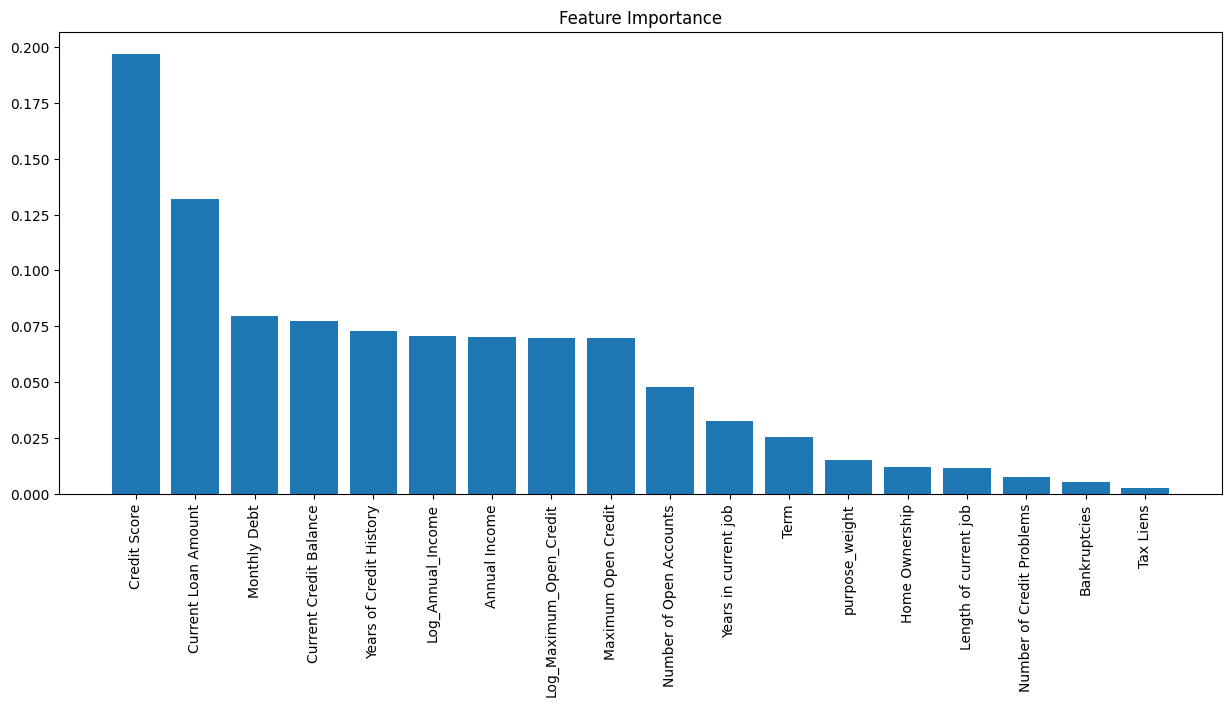

In [36]:
#feature importance- plot- increasing importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
plt.title("Feature Importance")

plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()
